# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom. DO NOT download it from the link provided (It may be different).**

Due Date : 03/02 (2nd March), 11:59 PM EST

## Name: Riya Gupta

## UNI: rg3332

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


## Question 1: Decision Trees

**1.1: Load the provided dataset**

*import important modules*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import os, re, sys
import random
import seaborn as sns

In [2]:
df = pd.read_csv("tb_lobby_stats_player.csv")  ##load the dataset and view it
df.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


In [3]:
df.describe()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner
count,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184152.000000,184032.000000,...,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,183447.000000,184152.000000
mean,84720.886854,1361.148622,88343.226248,19.113531,3.756033,18.792459,7.640123,0.316054,1.321349,0.022463,...,3.095254,0.570012,9.642889,29.305194,13.525509,1.902511,5.106091,2.265641,2.496509,0.493766
std,49931.048091,784.157397,51564.451107,7.481041,2.205265,5.211614,4.042324,0.575803,1.336699,0.156566,...,1.885027,0.906774,4.769723,11.657993,7.102067,1.650325,2.924184,2.062294,2.162557,0.499962
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41399.750000,676.000000,43742.750000,14.000000,2.000000,16.000000,5.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,6.000000,21.000000,8.000000,1.000000,3.000000,1.000000,1.000000,0.000000
50%,83838.500000,1388.000000,87877.500000,19.000000,4.000000,19.000000,7.000000,0.000000,1.000000,0.000000,...,3.000000,0.000000,9.000000,28.000000,13.000000,2.000000,5.000000,2.000000,2.000000,0.000000
75%,127911.250000,2061.000000,133000.250000,24.000000,5.000000,22.000000,10.000000,1.000000,2.000000,0.000000,...,4.000000,1.000000,12.000000,36.000000,18.000000,3.000000,7.000000,3.000000,4.000000,1.000000
max,172911.000000,2716.000000,178500.000000,85.000000,24.000000,65.000000,41.000000,5.000000,12.000000,12.000000,...,20.000000,14.000000,49.000000,122.000000,77.000000,17.000000,30.000000,21.000000,22.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184152 entries, 0 to 184151
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idLobbyGame     184152 non-null  int64  
 1   idPlayer        184152 non-null  int64  
 2   idRoom          184152 non-null  int64  
 3   qtKill          184152 non-null  int64  
 4   qtAssist        184152 non-null  int64  
 5   qtDeath         184152 non-null  int64  
 6   qtHs            184152 non-null  int64  
 7   qtBombeDefuse   184152 non-null  int64  
 8   qtBombePlant    184152 non-null  int64  
 9   qtTk            184032 non-null  float64
 10  qtTkAssist      184032 non-null  float64
 11  qt1Kill         184152 non-null  int64  
 12  qt2Kill         184152 non-null  int64  
 13  qt3Kill         184152 non-null  int64  
 14  qt4Kill         184152 non-null  int64  
 15  qt5Kill         184152 non-null  int64  
 16  qtPlusKill      184152 non-null  int64  
 17  qtFirstKil

In [5]:
cols = df.columns.values.tolist()
print(cols)

['idLobbyGame', 'idPlayer', 'idRoom', 'qtKill', 'qtAssist', 'qtDeath', 'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist', 'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill', 'qtFirstKill', 'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive', 'qtClutchWon', 'qtRoundsPlayed', 'descMapName', 'vlLevel', 'qtSurvived', 'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 'flWinner', 'dtCreatedAt']


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

Steps for 1.2 :
- Finding out the missing values and percentage of missing values
- Answers to the questions asked
- Dropping columns

In [6]:
###some basic information of the dataset, also to figure out how many of them are categorical or numerical
## code from my previous notebook (Assignment 1) to check the null values 

print("Are there are any null values :", df.isnull().values.any())
print("NaN values features", df.columns[df.isnull().any()].tolist() )
print("Categorical:", list(df.select_dtypes(include=['object']).columns))
print("Numerical:", list(df.select_dtypes(exclude=['object']).columns))
total_null = df.isnull().sum()
unique = df.nunique(axis=0)
percentage = (df.isnull().sum().sort_values(ascending=False)/len(df))*100
out = pd.concat([total_null,percentage, unique],axis=1, keys=["unique","total_null","percentage"])
out

Are there are any null values : True
NaN values features ['qtTk', 'qtTkAssist', 'qtHits', 'qtLastAlive', 'qtSurvived', 'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg']
Categorical: ['descMapName', 'dtCreatedAt']
Numerical: ['idLobbyGame', 'idPlayer', 'idRoom', 'qtKill', 'qtAssist', 'qtDeath', 'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist', 'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill', 'qtFirstKill', 'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive', 'qtClutchWon', 'qtRoundsPlayed', 'vlLevel', 'qtSurvived', 'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 'flWinner']


,unique,total_null,percentage
idLobbyGame,0,0.000000,172911
idPlayer,0,0.000000,2469
idRoom,0,0.000000,178500
qtKill,0,0.000000,74
qtAssist,0,0.000000,21
qtDeath,0,0.000000,58
qtHs,0,0.000000,39
qtBombeDefuse,0,0.000000,6
qtBombePlant,0,0.000000,13
qtTk,120,0.065164,7


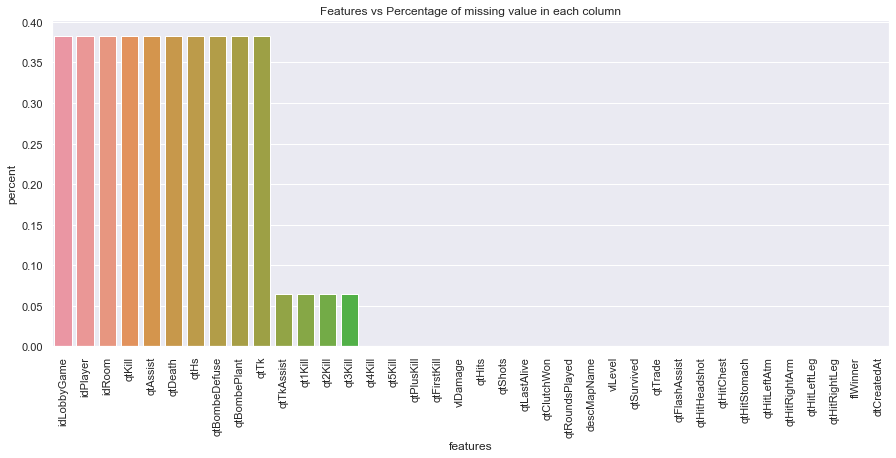

In [7]:
sns.set(rc={'figure.figsize':(15,6)});
plot_df = pd.DataFrame({'features':cols,'percent':percentage});
ax = sns.barplot(x='features',y ='percent',data=plot_df);
plt.xticks(rotation=90);
plt.title("Features vs Percentage of missing value in each column");

**Ans :** Yes, we will drop the 'dtCreatedAt', 'idLobbyGame','idPlayer','idRoom' because these are not important features for our model. Yes, I will consider imputing the values in general but CART automatically provides the feature of ignoring missing values. Additonally, I will not impute the **"categorical"** features, but we can encode it via labelencoder or onehotencoder.

In [8]:
final_df = df.drop(columns=['dtCreatedAt'])

In [9]:
final_df.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner
0,1,1,1,5,1,16,2,0,0,0.0,...,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0
1,2,1,2,24,3,18,6,0,4,0.0,...,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1
2,3,2,3,6,4,23,2,0,1,0.0,...,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0
3,3,391,27508,10,5,20,4,1,0,0.0,...,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1
4,4,2,4,8,4,26,6,0,2,0.0,...,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0


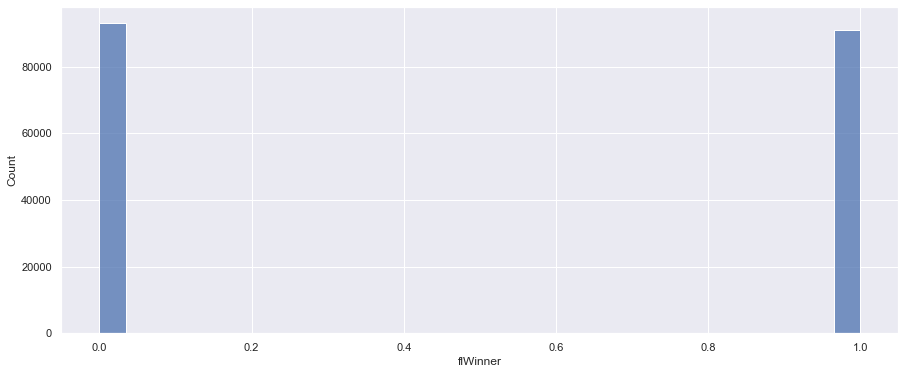

In [10]:
new_df = final_df.drop(columns=['idLobbyGame','idPlayer','idRoom'], axis=1)
sns.histplot(data=new_df,x='flWinner');

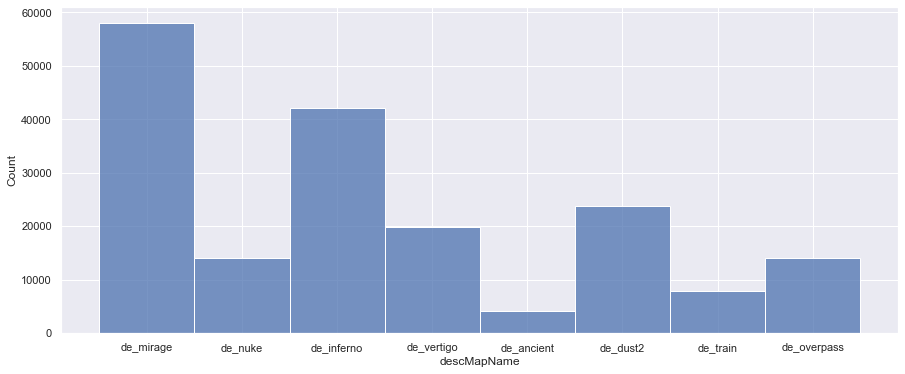

In [11]:
sns.histplot(data=new_df,x='descMapName');

#### As we can see the class is balanced for x=f1winner feature, and we can also see the best maps are de_mirage and de_inferno which have above than 50% count

**1.3: Plot side-by-siide bars of class distribtuion for each category for the categorical feature and the target categories.**

/var/folders/hk/fpn69pcx6jq8n7glwbj2pbp40000gn/T/ipykernel_3784/827596898.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


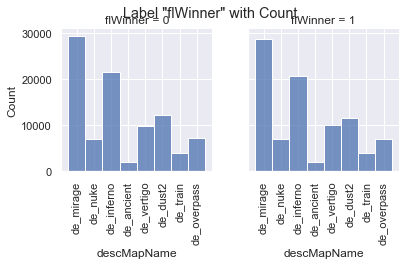

In [12]:
p1 = new_df.select_dtypes(['object']).columns[0];
p2 = sns.FacetGrid(new_df,col="flWinner");
pltf = p2.map(sns.histplot,p1);
plt.suptitle('Label "flWinner" with Count');

for axes in pltf.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [13]:
target = new_df["flWinner"]
data = new_df.drop(columns=["flWinner"])

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

col_null = data.columns[data.isnull().any()].tolist()
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for i in col_null:
    data[i] = mean_imputer.fit_transform(data[[i]]).ravel()
print("Missing values in new dataset:",data.isnull().any().sum())

Missing values in new dataset: 0


**Ans:** I chose to split the 60-20-20 split for the training-test-val, we choose the random state because the dataset target was balanced as we have seen previously from the barplots, hence we can shuffle it as well

In [15]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(data, target, test_size=0.2, shuffle = True, random_state= 5) #test
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, shuffle = True, random_state = 5) #val

In [16]:
print("Train shape:",X_train.shape)
print("Test shape:", X_test.shape)
print("Val shape:", X_val.shape)

Train shape: (110490, 33)
Test shape: (36831, 33)
Val shape: (36831, 33)


**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

* note : added the label encoder so that there are no multiple one-hot encoded columns for maps/categorical values

In [17]:
from sklearn.preprocessing import LabelEncoder

###to avoid information leak
le = LabelEncoder()
X_train['descMapName'] = le.fit_transform(X_train['descMapName'])
X_dev['descMapName'] = le.transform(X_dev['descMapName'])
X_test['descMapName'] = le.transform(X_test['descMapName'])
X_val['descMapName'] = le.transform(X_val['descMapName'])

In [18]:
X_dev.head()

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,...,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg
13338,17,2,13,13,0,0,0.0,0.0,6,3,...,9.0,1.0,2.0,16.0,19.0,8.0,1.0,1.0,2.0,0.0
31975,30,6,22,16,0,1,0.0,0.0,11,5,...,7.0,4.0,0.0,17.0,48.0,17.0,2.0,15.0,3.0,1.0
126175,13,1,21,2,0,0,0.0,0.0,6,2,...,3.0,3.0,1.0,2.0,32.0,6.0,0.0,7.0,0.0,2.0
69258,24,7,17,13,0,3,0.0,2.0,12,4,...,10.0,4.0,1.0,16.0,32.0,16.0,0.0,10.0,0.0,2.0
107408,16,5,17,8,1,1,0.0,1.0,6,5,...,3.0,2.0,0.0,10.0,30.0,12.0,1.0,3.0,2.0,4.0


In [19]:
X_test.head()

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,...,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg
137470,18,5,13,5,0,2,0.0,0.0,9,3,...,9.0,3.0,1.0,5.0,25.0,14.0,2.0,3.0,1.0,2.0
149132,20,6,15,8,0,0,0.0,0.0,4,8,...,6.0,2.0,0.0,11.0,28.0,16.0,5.0,6.0,4.0,3.0
71605,17,4,21,10,0,1,0.0,0.0,8,1,...,4.0,6.0,1.0,12.0,28.0,3.0,3.0,7.0,2.0,1.0
110669,16,3,19,8,1,2,0.0,0.0,7,1,...,5.0,7.0,0.0,12.0,18.0,10.0,0.0,4.0,3.0,1.0
65391,11,6,19,1,0,2,0.0,2.0,5,3,...,7.0,7.0,0.0,4.0,25.0,22.0,1.0,3.0,5.0,4.0


**Ans :** Scaling will not be needed in the case of Decision Trees because decision trees make cut between the nodes, so their values does not make a huge difference for the cutting. Hence we can say Decision Tree is *SCALE INVARIANT*

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

#### Unpruned DT

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model_dt = DecisionTreeClassifier()
model_dt.fit(X_dev, y_dev)
predsDev = model_dt.predict(X_dev)
predsTest = model_dt.predict(X_test)

In [21]:
test_score =  accuracy_score(y_test, predsTest)
dev_score = accuracy_score(y_dev, predsDev)

In [22]:
print("Classification Score for DT on Dev dataset:\n")
print("Dev Score : ", dev_score)
print(classification_report(y_dev, predsDev))
print(confusion_matrix(y_dev, predsDev))
print("--------------------------------------------------------")
print("Classification Score for DT on Test dataset:\n")
print("Test Score :", test_score)
print(classification_report(y_test, predsTest))
print(confusion_matrix(y_test, predsTest))

Classification Score for DT on Dev dataset:

Dev Score :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74660
           1       1.00      1.00      1.00     72661

    accuracy                           1.00    147321
   macro avg       1.00      1.00      1.00    147321
weighted avg       1.00      1.00      1.00    147321

[[74660     0]
 [    0 72661]]
--------------------------------------------------------
Classification Score for DT on Test dataset:

Test Score : 0.7261545980288344
              precision    recall  f1-score   support

           0       0.73      0.72      0.73     18564
           1       0.72      0.73      0.72     18267

    accuracy                           0.73     36831
   macro avg       0.73      0.73      0.73     36831
weighted avg       0.73      0.73      0.73     36831

[[13453  5111]
 [ 4975 13292]]


**Ans:** The performance is 1.0 on Dev dataset and 0.725 on Test dataset which has been transformed previously and the categorical value was converted to numerical using label encoder. Additonally, I believe the *accuracy_score, confusion matrix and classification report* are important metrics for our Decision Tree model here because they give us insights on how the features are effecting the model. Calculating just recall and precision does not make any sense here since we want to understand the effects of false positives and false negatives as well along with penalizing our model on the basis of their values.


**1.7: Visualize the trained tree until the max_depth 8**

['qtKill', 'qtAssist', 'qtDeath', 'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist', 'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill', 'qtFirstKill', 'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive', 'qtClutchWon', 'qtRoundsPlayed', 'descMapName', 'vlLevel', 'qtSurvived', 'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg']


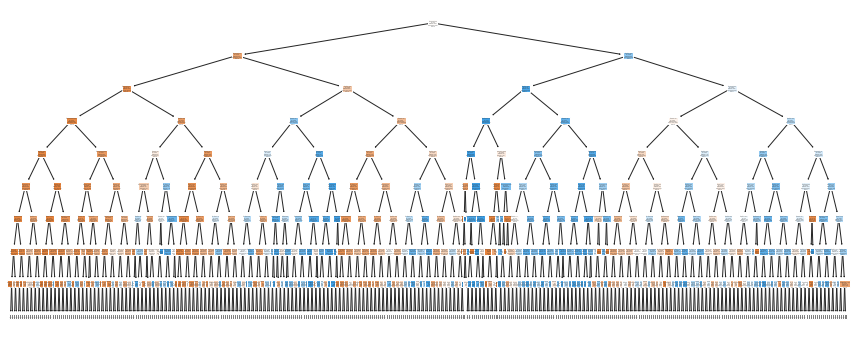

In [23]:
from sklearn import tree 
from sklearn.tree import plot_tree

dev_cols = X_dev.columns.to_list()
print(dev_cols)
classes = ['0', '1']
plot_tree(model_dt,max_depth=8,feature_names=dev_cols,class_names=classes,filled = True);

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

### Pruned DT

In [24]:
path = model_dt.cost_complexity_pruning_path(X_dev, y_dev)
alphas, impurities = path.ccp_alphas, path.impurities
alphas = alphas[-10:] ###taking last 10 alpha cuz it was taking too much time to train
print(alphas)

[0.00142326 0.00150112 0.00155996 0.0022472  0.00271355 0.00304663
 0.00690432 0.01579927 0.04035186 0.11786785]


In [25]:
model_dt_alpha = []
for i in alphas:
    model_dt1 = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    model_dt1.fit(X_dev,y_dev)
    model_dt_alpha.append(model_dt1)

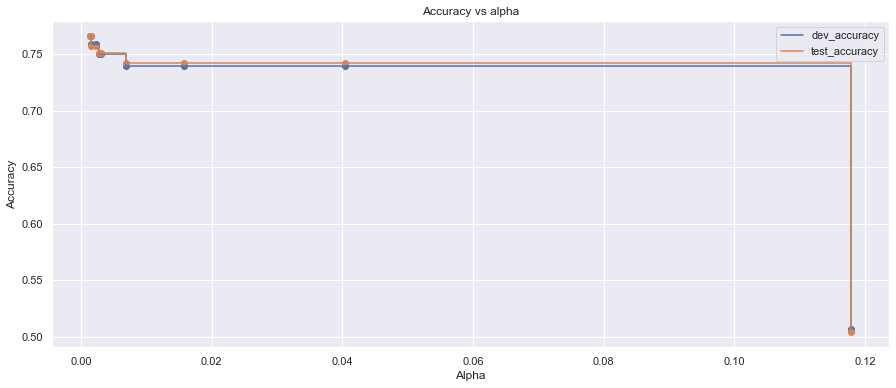

In [26]:
dev_acc = []
test_acc = []
for i in model_dt_alpha:
    y_dev_pred = i.predict(X_dev)
    y_test_pred = i.predict(X_test)
    dev_acc.append(accuracy_score(y_dev, y_dev_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    
plt.scatter(alphas,dev_acc)
plt.scatter(alphas,test_acc)
plt.plot(alphas,dev_acc,label='dev_accuracy',drawstyle="steps-post")
plt.plot(alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs alpha')
plt.show()

### We can choose alpha as 0.03

In [27]:
###cite : https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial

best_alpha_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=0.03)
best_alpha_dt.fit(X_dev,y_dev)
y_pruned_dev = best_alpha_dt.predict(X_dev)
y_pruned_test = best_alpha_dt.predict(X_test)

In [28]:
test_score_pruned =  accuracy_score(y_test, y_pruned_test)
dev_score_pruned = accuracy_score(y_dev, y_pruned_dev)

In [29]:
print("Classification Score for Pruned DT on Dev dataset:\n")
print("Dev Score : ", dev_score_pruned)
print(classification_report(y_dev, y_pruned_dev))
print(confusion_matrix(y_dev, y_pruned_dev))
print("--------------------------------------------------------")
print("Classification Score for Pruned DT on Test dataset:\n")
print("Test Score :", test_score_pruned)
print(classification_report(y_test, y_pruned_test))
print(confusion_matrix(y_test, y_pruned_test))

Classification Score for Pruned DT on Dev dataset:

Dev Score :  0.7396908791007392
              precision    recall  f1-score   support

           0       0.78      0.67      0.72     74660
           1       0.71      0.81      0.75     72661

    accuracy                           0.74    147321
   macro avg       0.74      0.74      0.74    147321
weighted avg       0.75      0.74      0.74    147321

[[50075 24585]
 [13764 58897]]
--------------------------------------------------------
Classification Score for Pruned DT on Test dataset:

Test Score : 0.7419293529906872
              precision    recall  f1-score   support

           0       0.79      0.67      0.72     18564
           1       0.71      0.82      0.76     18267

    accuracy                           0.74     36831
   macro avg       0.75      0.74      0.74     36831
weighted avg       0.75      0.74      0.74     36831

[[12419  6145]
 [ 3360 14907]]


**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

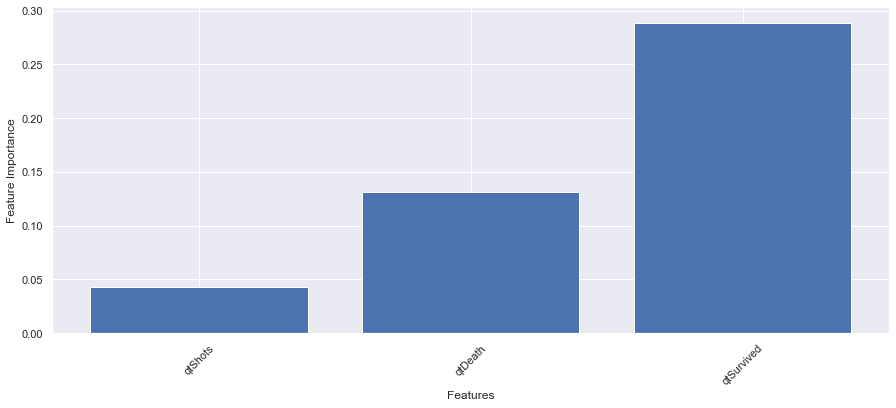

In [30]:
feature_imp = model_dt.feature_importances_
# print("Feature importances:\n{}".format(feature_imp))
final_list = zip(feature_imp,X_dev.columns)
res = sorted(final_list, key = lambda x: x[0])
res = res[-3:]

plt.bar(range(len(res)),[val[0] for val in res],align='center')
plt.xticks(range(len(res)),[val[1] for val in res])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()

**Ans :** The three top features are "qtSurvived", "qtDeath", "qtShots". This means the first split is happening at "qtSurvived" which is followed by second split at "qtDeath" and third split at "qtShots". Since the first feature or the most important feature is "qtSurvived", it also is demonstrating the impurity coeffiocient or gini coefficient is the best at splits occuring after "qtSurvived".

## Question 2: Random Forests

#### import  important modules

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [32]:
model_rf = RandomForestClassifier()
model_rf.fit(X_dev, y_dev)
predsDevrf = model_rf.predict(X_dev)
predsTestrf = model_rf.predict(X_test)

In [33]:
testrf_score =  accuracy_score(y_test, predsTestrf)
devrf_score = accuracy_score(y_dev, predsDevrf)

In [34]:
print("Classification Score for Random Forest on Dev dataset:\n")
print("Dev Score : ", devrf_score)
print(classification_report(y_dev, predsDevrf))
print(confusion_matrix(y_dev, predsDevrf))
print("--------------------------------------------------------")
print("Classification Score for Random Forest on Test dataset:\n")
print("Test Score :", testrf_score)
print(classification_report(y_test, predsTestrf))
print(confusion_matrix(y_test, predsTestrf))

Classification Score for Random Forest on Dev dataset:

Dev Score :  0.9999932121014655
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74660
           1       1.00      1.00      1.00     72661

    accuracy                           1.00    147321
   macro avg       1.00      1.00      1.00    147321
weighted avg       1.00      1.00      1.00    147321

[[74659     1]
 [    0 72661]]
--------------------------------------------------------
Classification Score for Random Forest on Test dataset:

Test Score : 0.7878146126903967
              precision    recall  f1-score   support

           0       0.78      0.81      0.79     18564
           1       0.80      0.76      0.78     18267

    accuracy                           0.79     36831
   macro avg       0.79      0.79      0.79     36831
weighted avg       0.79      0.79      0.79     36831

[[15061  3503]
 [ 4312 13955]]


**Ans:** Yes, the random forest classification performs better than the decision tree (both pruned and unpruned) classifier by miore than 0.02 points. The accuracy score for DT unpruned is 0.7280008688333197 and for DT pruned is 0.7419293529906872 whereas the accuracy score for Random Forest is nearly 0.7867557220819419.

hence **RF > DT Pruned > DT Unpruned**

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

**Ans:** Yes, all the leaves are pure, we can verify this using the below code

In [35]:
### cite : https://stackoverflow.com/questions/55276902/how-can-i-get-information-about-the-trees-in-a-random-forest-in-sklearn

rf_trees = model_rf.estimators_
leaf = 0
for tree in rf_trees:
    impure  = 0
    tree_obj = tree.tree_
    impure_mat = tree_obj.impurity
    n_nodes = tree_obj.node_count
    
    for i in range(n_nodes):
        if tree_obj.children_right[i]== -1 or tree_obj.children_left[i]== -1:
            if impure_mat[i]!=0:
                impure+=1
            leaf+=1
pure = leaf-impure
print("Total Nodes: ", leaf)
print("Pure Nodes: ", pure)
print("Impure Nodes :", impure)

Total Nodes:  2023521
Pure Nodes:  2023521
Impure Nodes : 0


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


***Ans:***
We can perform parameter tuning in multiple ways. I have picked 3 features:
- n_estimators : number of trees built before majority voting which effects the performance
- max_samples_split : prevents larger trees and prevents overfitting
- bootstrapping : reduces the variance in the tree

Hence I will choose these parameters.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

**Ans:** Since the model was taking alot of time during training due to time constraints I have used lesser parameter values for n_estimators, however as we increase the n_estimator value like 100, 200, etc, it will improve the performance and as well as will make the network more denser and complex, similarly on increasing max_samples_split, we can avoid the further growth of the trees hence preventing overfitting.

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [36]:
import random
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [37]:
parameters = {'min_samples_split': np.linspace(10,100,5,dtype=int),
              'n_estimators': np.linspace(10,20,5,dtype=int),
             'bootstrap': [True]}

print(parameters)

{'min_samples_split': array([ 10,  32,  55,  77, 100]), 'n_estimators': array([10, 12, 15, 17, 20]), 'bootstrap': [True]}


In [38]:
tune_rf = GridSearchCV(estimator=model_rf,param_grid=parameters,cv=5)
tune_rf.fit(X_dev, y_dev)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'min_samples_split': array([ 10,  32,  55,  77, 100]),
                         'n_estimators': array([10, 12, 15, 17, 20])})

In [39]:
print("Best Score :", tune_rf.best_score_)
print("Best Parameters :",tune_rf.best_params_)

Best Score : 0.7883057882311484
Best Parameters : {'bootstrap': True, 'min_samples_split': 100, 'n_estimators': 20}


In [40]:
predsDevrf_tuned = tune_rf.predict(X_dev)
predsTestrf_tuned = tune_rf.predict(X_test)

print("Score on Dev data for RF using GridSearchCV:", accuracy_score(y_dev, predsDevrf_tuned))
print("Score on Test data for RF using GridSearchCV:",accuracy_score(y_test, predsTestrf_tuned))

Score on Dev data for RF using GridSearchCV: 0.8368935861146748
Score on Test data for RF using GridSearchCV: 0.7863756075045478


**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

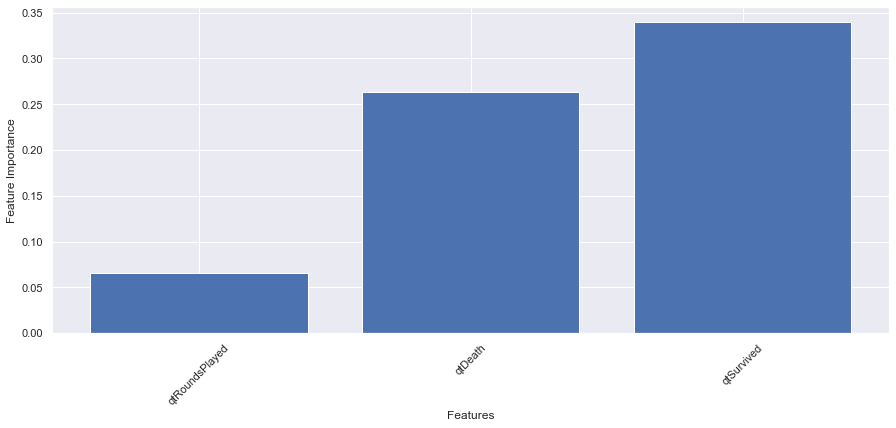

In [42]:
feature_imp_rf = tune_rf.best_estimator_.feature_importances_
# print("Feature importances:\n{}".format(feature_imp_rf))
final_list_rf = zip(feature_imp_rf,X_dev.columns)
res_rf = sorted(final_list_rf, key = lambda x: x[0])
res_rf = res_rf[-3:]

plt.bar(range(len(res_rf)),[val[0] for val in res_rf],align='center')
plt.xticks(range(len(res_rf)),[val[1] for val in res_rf])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()

**Ans :** One of the features which is different than what we have recieved in Decision trees, for random forest is *"qTRoundsPlayed"*. I believe the features in Random forest makes more sense because they are aggregated over multiple decision trees instead of a single Decision Tree. The features that we will consider will be the following :***
- qTRoundsPlayed
- qTdeath
- qtSurvived

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

#### import important modules

In [43]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import TransformerMixin
import xgboost as xgb

/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


##### Gradient boosting classifier (with tuning as well)

In [44]:
parameters_gb = {'n_estimators': [10,15],
                  'max_depth': [5,10],
                  'learning_rate' : [0.001,0.01]}
print(parameters_gb)

{'n_estimators': [10, 15], 'max_depth': [5, 10], 'learning_rate': [0.001, 0.01]}


In [45]:
import time
gbm = GradientBoostingClassifier()

In [46]:
gbm.fit(X_dev, y_dev)

GradientBoostingClassifier()

In [47]:
start_time = time.monotonic()
tune_gbm = GridSearchCV(estimator=gbm,param_grid=parameters_gb,cv= 5)
tune_gbm.fit(X_dev, y_dev)
end_time = time.monotonic()

In [48]:
print("Best Score GB:", tune_gbm.best_score_)
print("Best Parameters GB :",tune_gbm.best_params_)

Best Score GB: 0.7837035896604665
Best Parameters GB : {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 15}


In [49]:
from datetime import timedelta

print("Time taken by the GB to run :", timedelta(seconds= end_time - start_time ))

Time taken by the GB to run : 0:04:54.469356


##### Hist Gradient boosting classifier (with tuning as well)

In [50]:
parameters_hgb = {'l2_regularization': [0.1,0.55],
                  'max_depth': [5,10],
                  'learning_rate' : [0.001,0.01]}
print(parameters_hgb)

{'l2_regularization': [0.1, 0.55], 'max_depth': [5, 10], 'learning_rate': [0.001, 0.01]}


In [51]:
hgbm_start_time = time.monotonic()
hgbm = HistGradientBoostingClassifier()
hgbm.fit(X_dev, y_dev)
tune_hgbm = GridSearchCV(estimator=hgbm,param_grid=parameters_hgb,cv=5)
tune_hgbm.fit(X_dev, y_dev)
hgbm_end_time = time.monotonic()

In [52]:
print("Best Score HGB :", tune_hgbm.best_score_)
print("Best Parameters HGB :",tune_hgbm.best_params_)

Best Score HGB : 0.7858553452950133
Best Parameters HGB : {'l2_regularization': 0.1, 'learning_rate': 0.01, 'max_depth': 10}


In [53]:
print("Time taken by the HGB to run :", timedelta(seconds= hgbm_end_time - hgbm_start_time ))

Time taken by the HGB to run : 0:01:14.557747


### now we have to get the accuracy score of test dataset for the optimal models

### 1. Gradient Boosting

- Get the best parameters first and store them in a new variable
- Fit the model again on best parameters
- Get the accuracy on test and dev data for best paramaters

In [54]:
n_estimators = tune_gbm.best_params_['n_estimators']
max_depth = tune_gbm.best_params_['max_depth']
learning_rate = tune_gbm.best_params_['learning_rate']

In [55]:
print(n_estimators,max_depth,learning_rate)

15 10 0.01


In [56]:
gb_best = GradientBoostingClassifier(max_depth=max_depth,n_estimators=n_estimators,learning_rate=learning_rate)
gb_best.fit(X_dev,y_dev)

GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=15)

In [57]:
predsDev_gb_best = gb_best.predict(X_dev)
predsTest_gb_best = gb_best.predict(X_test)

In [58]:
print("Score on Dev data on best GB:", accuracy_score(y_dev, predsDev_gb_best))
print("Score on Test data on best GB:",accuracy_score(y_test, predsTest_gb_best))

Score on Dev data on best GB: 0.8074205306779074
Score on Test data on best GB: 0.7846379408650321


### 2. Hist Gradient Boosting Classifier

- Get the best parameters first and store them in a new variable
- Fit the model again on best parameters
- Get the accuracy on test and dev data for best paramaters

In [59]:
learning_rate_hgb = tune_hgbm.best_params_['learning_rate']
max_depth_hgb = tune_hgbm.best_params_['max_depth']
l2_regularization_hgb = tune_hgbm.best_params_['l2_regularization']

In [60]:
print(learning_rate_hgb,max_depth_hgb,l2_regularization_hgb)

0.01 10 0.1


In [61]:
hgb_best = HistGradientBoostingClassifier(max_depth=max_depth_hgb,l2_regularization=l2_regularization_hgb,learning_rate=learning_rate_hgb)
hgb_best.fit(X_dev,y_dev)

HistGradientBoostingClassifier(l2_regularization=0.1, learning_rate=0.01,
                               max_depth=10)

In [62]:
predsDev_hgb_best = hgb_best.predict(X_dev)
predsTest_hgb_best = hgb_best.predict(X_test)

In [63]:
print("Score on Dev data on best HGB:", accuracy_score(y_dev, predsDev_hgb_best))
print("Score on Test data on best HGB:",accuracy_score(y_test, predsTest_hgb_best))

Score on Dev data on best HGB: 0.7873758663055505
Score on Test data on best HGB: 0.7828731231842742


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [64]:
parameters_xgb = {'n_estimators': [10,15],
                  'max_depth': [5,10],
                  'learning_rate' : [0.001,0.01]}
print(parameters_xgb)

{'n_estimators': [10, 15], 'max_depth': [5, 10], 'learning_rate': [0.001, 0.01]}


In [66]:
import warnings
warnings.filterwarnings('ignore')

xgb_start_time = time.monotonic()
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_dev,y_dev)
tune_xgb = GridSearchCV(estimator=xgb_model,param_grid=parameters_xgb,cv=5)
tune_xgb.fit(X_dev, y_dev)
xgb_end_time = time.monotonic()

[22:43:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:45] WARNING: /Users/runner/miniforge3/cond

[22:44:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:06] WARNING: /Users/runner/miniforge3/cond

In [67]:
print("Best Score XGB :", tune_xgb.best_score_)
print("Best Parameters XGB :",tune_xgb.best_params_)

Best Score XGB : 0.7860589905445188
Best Parameters XGB : {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 15}


In [68]:
print("Time taken by the XGBoost normal and tuned to run :", timedelta(seconds= xgb_end_time - xgb_start_time ))

Time taken by the XGBoost normal and tuned to run : 0:00:42.559885


In [69]:
n_estimators_xgb = tune_xgb.best_params_['n_estimators']
max_depth_xgb = tune_xgb.best_params_['max_depth']
learning_rate_xgb = tune_xgb.best_params_['learning_rate']

In [70]:
best_xgb = xgb.XGBClassifier(max_depth=max_depth_xgb,n_estimators=n_estimators_xgb,learning_rate=learning_rate_xgb)
best_xgb.fit(X_dev,y_dev)

predsDev_xgb_best = best_xgb.predict(X_dev)
predsTest_xgb_best = best_xgb.predict(X_test)

[22:46:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
print("Score on Development data on best XGB:", accuracy_score(y_dev, predsDev_xgb_best))
print("Score on Test data on best XGB:",accuracy_score(y_test, predsTest_xgb_best))

Score on Development data on best XGB: 0.8071558026350623
Score on Test data on best XGB: 0.7864570606282751


#### Ans : The performance of XGBoost > Gradient Boost > Histogram-based Gradient Boosting

The performance has an average of 0.78, this can be increased with the parameter tuning(hyperparamters can be changed), but due to the time constraints I have kept the minimal values for n_estimators. The values show the better performance on XGBoost. The following are the performances:
- XGBoost : 0.7864570606282751
- Histogram-based Gradient Boosting : 0.7828731231842742, and 
- Gradient Boost : 0.7846379408650321

Hence as you can see, XGBoost performs much better than the other models from Q3.1


**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

In [72]:
print("Score on Test data on Unpruned Decision Tree :", test_score)
print("Score on Test data on Pruned Decision Tree :", test_score_pruned)
print("Score on Test data on Random forest :", testrf_score)
print("Score on Test data on best GB:", accuracy_score(y_test, predsTest_gb_best))
print("Score on Test data on best HGB:", accuracy_score(y_test, predsTest_hgb_best))
print("Score on Test data on best XGB:", accuracy_score(y_test, predsTest_xgb_best))

Score on Test data on Unpruned Decision Tree : 0.7261545980288344
Score on Test data on Pruned Decision Tree : 0.7419293529906872
Score on Test data on Random forest : 0.7878146126903967
Score on Test data on best GB: 0.7846379408650321
Score on Test data on best HGB: 0.7828731231842742
Score on Test data on best XGB: 0.7864570606282751


#### Random Forest > XGBoost > Gradient Boost > Histogram-based Gradient Boosting > Pruned Decision Tree > Unpruned Decision Tree (Pure)

**Ans:** Random forest performs better than the rest of the models and the unpruned Decision Tree performs the worst. As you can see the value of XGBoost is almost near to the accuracy score of Random Forest. Additonally, on every run the value of XGBoost was fluctuating depending on the parameter tuning. 
I will choose XGBoost over Random Forest irrespective of this miniscule difference because XGBoost is faster and gives value to functional space. It is also regularized and performs better in general, hence my general approach would be to choose it over Random Forest Classifier. 

The difference between XGBoost and Random Forest is <0.02%

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

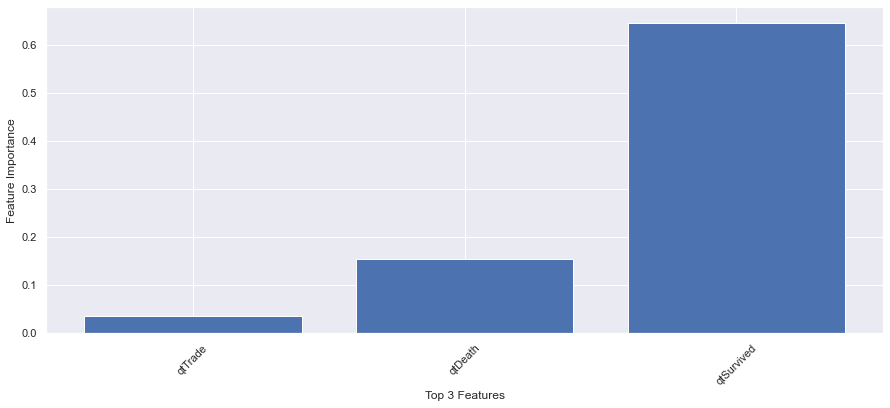

In [73]:
feature_imp_xgb = tune_xgb.best_estimator_.feature_importances_
final_list_xgb = zip(feature_imp_xgb,X_dev.columns)
res_xgb = sorted(final_list_xgb, key = lambda x: x[0])
res_xgb = res_xgb[-3:]
plt.bar(range(len(res_xgb)),[val[0] for val in res_xgb],align='center')
plt.xticks(range(len(res_xgb)),[val[1] for val in res_xgb])
plt.xticks(rotation=45)
plt.xlabel('Top 3 Features')
plt.ylabel('Feature Importance')
plt.show()

**Ans :** 
One of the features in this visualization are different that is **XGB has "qtTrade"** but in **decision trees we have "qtShots"** and in **random forest we have "qTRoundsPlayed"**, rest are same. Additonally, the scale of "qtSurvived" is different in all the cases, here it is more than 0.6. I believe the features in XGBoost makes more sense since the subset or modified sample is not taken into consideration like decision trees or random forest but the feature as a whole is given importance. We will consider these features: 
- qtTrade
- qTdeath
- qtSurvived

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

#### 7 features

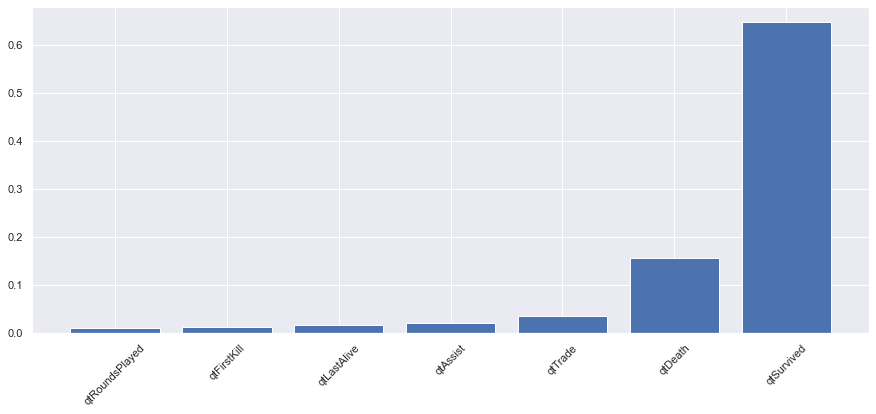

In [74]:
feature_imp_xgb = tune_xgb.best_estimator_.feature_importances_
final_list_xgb = zip(feature_imp_xgb,X_dev.columns)
res_xgb = sorted(final_list_xgb, key = lambda x: x[0])
res_xgb_7 = res_xgb[-7:]

plt.bar(range(len(res_xgb_7)),[val[0] for val in res_xgb_7],align='center')
plt.xticks(range(len(res_xgb_7)),[val[1] for val in res_xgb_7])
plt.xticks(rotation=45)
plt.show()

In [77]:
print(res_xgb_7)
xgb_7 = [val[1] for val in res_xgb_7]
print("7 features are: ",xgb_7)

[(0.010979449, 'qtRoundsPlayed'), (0.012762572, 'qtFirstKill'), (0.017620524, 'qtLastAlive'), (0.020249313, 'qtAssist'), (0.035073925, 'qtTrade'), (0.15532872, 'qtDeath'), (0.64698017, 'qtSurvived')]
7 features are:  ['qtRoundsPlayed', 'qtFirstKill', 'qtLastAlive', 'qtAssist', 'qtTrade', 'qtDeath', 'qtSurvived']


In [78]:
###copy the original splitted data to prevent conflicts

X_dev_xgb = X_dev.copy()
X_test_xgb = X_test.copy()
y_dev_xgb = y_dev.copy()
y_test_xgb = y_test.copy()

xgb_7_data_dev = X_dev_xgb[xgb_7]
xgb_7_data_test = X_test_xgb[xgb_7]

In [80]:
xgb_7_data_dev

,qtRoundsPlayed,qtFirstKill,qtLastAlive,qtAssist,qtTrade,qtDeath,qtSurvived
13338,22,3,0.0,2,1.0,13,9.0
31975,30,5,1.0,6,4.0,22,7.0
126175,24,3,0.0,1,3.0,21,3.0
69258,28,2,1.0,7,4.0,17,10.0
107408,22,1,2.0,5,2.0,17,3.0
...,...,...,...,...,...,...,...
121974,21,1,0.0,2,1.0,19,2.0
124605,24,4,0.0,7,1.0,16,8.0
20463,25,1,0.0,2,3.0,21,4.0
18638,30,3,2.0,5,2.0,20,8.0


In [81]:
xgb_7_data_test

,qtRoundsPlayed,qtFirstKill,qtLastAlive,qtAssist,qtTrade,qtDeath,qtSurvived
137470,23,2,1.0,5,3.0,13,9.0
149132,21,2,0.0,6,2.0,15,6.0
71605,27,1,2.0,4,6.0,21,4.0
110669,25,2,1.0,3,7.0,19,5.0
65391,28,0,1.0,6,7.0,19,7.0
...,...,...,...,...,...,...,...
109188,35,4,0.0,4,9.0,25,10.0
73288,24,3,0.0,5,1.0,13,9.0
93604,29,0,0.0,3,4.0,25,4.0
93865,24,2,1.0,3,3.0,22,1.0


In [82]:
parameters_xgb_7 = {'n_estimators': [10,15],
                  'max_depth': [5,10],
                  'learning_rate' : [0.001,0.01]}
print(parameters_xgb_7)

{'n_estimators': [10, 15], 'max_depth': [5, 10], 'learning_rate': [0.001, 0.01]}


In [83]:
xgb_7_start_time = time.monotonic()
xgb_7_model = xgb.XGBClassifier()
xgb_7_model.fit(X_dev_xgb,y_dev_xgb)
tune_7_xgb = GridSearchCV(estimator=xgb_7_model,param_grid=parameters_xgb_7,cv=5)
tune_7_xgb.fit(X_dev_xgb,y_dev_xgb)
xgb_7_end_time = time.monotonic()

[23:10:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:00] WARNING: /Users/runner/miniforge3/cond

[23:11:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:19] WARNING: /Users/runner/miniforge3/cond

In [84]:
print("Best Score for 7 features using tuned XGB :", tune_7_xgb.best_score_)
print("Best Parameters for 7 features using tuned XGB :",tune_7_xgb.best_params_)

Best Score for 7 features using tuned XGB : 0.7860589905445188
Best Parameters for 7 features using tuned XGB : {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 15}


In [85]:
print("Time taken by the XGB to run :", timedelta(seconds= xgb_7_end_time - xgb_7_start_time ))

Time taken by the XGB to run : 0:00:39.868113


In [86]:
predsTest_xgb_7_best = tune_7_xgb.predict(X_test_xgb)

In [87]:
print("Score on Test data for 7 features of XGB:",accuracy_score(y_test, predsTest_xgb_7_best))

Score on Test data for 7 features of XGB: 0.7864570606282751


**Ans:** No, this model does not perform explicitly better than the original model in 3.2. The original model has the value  **0.7864570606282751 (XGB org)** and the value of the model with the 7 features is **0.7864570606282751 (XGB 7 features)**. However, this new model performs similarly to the original one with very very less difference even if this model only has 7 features. 
I will prefer using this model for future learning and processes because it consists of the important features which are required for the learning and the difference is very less between the two(<.001%) hence the variance is already captured by this new model for the features and the properties from other non-required features can be removed.

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [88]:
from sklearn.metrics import brier_score_loss

In [90]:
b_score = brier_score_loss(y_test,tune_xgb.predict_proba(X_test)[:, [1]])
print("Brier Score for the XGB without Calibration on optimal hyperparameters :", b_score)

Brier Score for the XGB without Calibration on optimal hyperparameters : 0.2205290783826086


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

In [91]:
best_xgb_model = tune_xgb.best_estimator_

###splitting to calibrate on a smaller dataset
X_train_cal, X_cal, y_train_cal, y_cal = train_test_split(X_dev,y_dev,random_state=10)
xgbcal = best_xgb_model.fit(X_train_cal,y_train_cal)

[23:17:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

platt = CalibratedClassifierCV(xgbcal,cv ="prefit",method="sigmoid")
isotonic = CalibratedClassifierCV(xgbcal,cv ="prefit",method="isotonic")

In [93]:
platt.fit(X_cal,y_cal)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    enable_categorical=False,
                                                    gamma=0, gpu_id=-1,
                                                    importance_type=None,
                                                    interaction_constraints='',
                                                    learning_rate=0.01,
                                                    max_delta_step=0,
                                                    max_depth=10,
                                                    min_child_weight=1,
                                                    missing=n

In [94]:
isotonic.fit(X_cal,y_cal)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    enable_categorical=False,
                                                    gamma=0, gpu_id=-1,
                                                    importance_type=None,
                                                    interaction_constraints='',
                                                    learning_rate=0.01,
                                                    max_delta_step=0,
                                                    max_depth=10,
                                                    min_child_weight=1,
                                                    missing=n

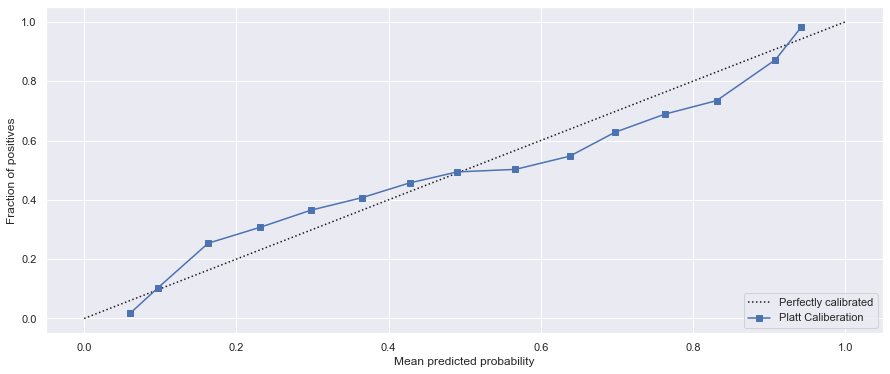

In [95]:
display1 = CalibrationDisplay.from_estimator(platt,X_test,y_test,n_bins=15,name="Platt Caliberation")

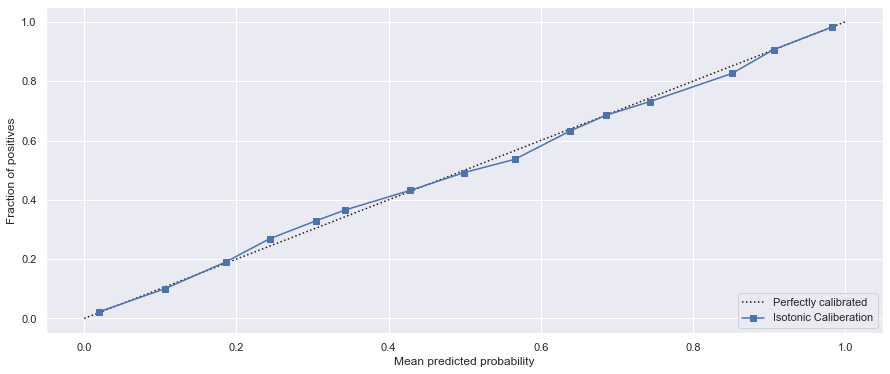

In [96]:
display2 = CalibrationDisplay.from_estimator(isotonic,X_test,y_test,n_bins=15,name="Isotonic Caliberation")

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [97]:
platt_scores = platt.predict_proba(X_test)[:, 1]
isotonic_scores = isotonic.predict_proba(X_test)[:, 1]

#### platt brier score 

In [98]:
b_score_platt = brier_score_loss(y_test,platt_scores)
print("Brier Score for the XGB with Calibration on optimal hyperparameters - Platt :", b_score_platt)

Brier Score for the XGB with Calibration on optimal hyperparameters - Platt : 0.14331034112115176


#### isotonic brier score 

In [99]:
b_score_isotonic = brier_score_loss(y_test, isotonic_scores)
print("Brier Score for the XGB with Calibration on optimal hyperparameters - Isotonic ", b_score_isotonic)

Brier Score for the XGB with Calibration on optimal hyperparameters - Isotonic  0.14029112852945233


**Ans:** Yes, the calibration methods help in having better predicted probabilities. As we can see that the values of the Brier Loss are less hence the model will perform better.